In [ ]:
実践9-1
以下のサンプルデータを作成してください。
data = {
  'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan', 'Julia', 'Kevin', 'Liam', 'Maya', 'Noah'],
  'age': [25, 30, 35, 40, 28, None, 32, 22, 45, 37, 51, 24, 29, None],
  'city': ['New York', 'London', 'Paris', 'Tokyo', 'Berlin', 'Moscow', 'Sydney', 'New York', 'London', 'Paris', 'Tokyo', 'Berlin', 'Moscow', 'Sydney'],
  'score': [85, 92, 88, 75, 90, 82, None, 79, 95, 68, 81, 72, 87, 63]
}
以下の前処理（含む可視化）を実施してください
サンプルデータ(name, age, city, score)を作成
データの確認(先頭行、データ型など)
欠損値の確認と除外
年齢の外れ値(25歳未満、45歳超)の除外
スコアの平均を計算し、新しい列に追加
都市ごとのスコアの平均を計算
年齢とスコアの関係を散布図で可視化
都市ごとのスコアの分布を棒グラフで可視化

In [8]:
# サンプルデータを表に変換
import pandas as pd

data = {
  'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace', 'Heidi', 'Ivan', 'Julia', 'Kevin', 'Liam', 'Maya', 'Noah'],
  'age': [25, 30, 35, 40, 28, None, 32, 22, 45, 37, 51, 24, 29, None],
  'city': ['New York', 'London', 'Paris', 'Tokyo', 'Berlin', 'Moscow', 'Sydney', 'New York', 'London', 'Paris', 'Tokyo', 'Berlin', 'Moscow', 'Sydney'],
  'score': [85, 92, 88, 75, 90, 82, None, 79, 95, 68, 81, 72, 87, 63]
}
df = pd.DataFrame(data)
df.head()


,name,age,city,score
0,Alice,25.0,New York,85.0
1,Bob,30.0,London,92.0
2,Charlie,35.0,Paris,88.0
3,David,40.0,Tokyo,75.0
4,Eve,28.0,Berlin,90.0


In [9]:
df.dtypes

,0
name,object
age,float64
city,object
score,float64


In [10]:
df.shape

(14, 4)

In [11]:
# 欠損値の確認と除外
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    14 non-null     object 
 1   age     12 non-null     float64
 2   city    14 non-null     object 
 3   score   13 non-null     float64
dtypes: float64(2), object(2)
memory usage: 580.0+ bytes


In [12]:
# 欠損値の数を確認
df.isnull().sum()   #欠損地でない個数をカウントする場合は df.count()

,0
name,0
age,2
city,0
score,1


In [13]:
#　欠損値がある行を削除
df.dropna(how='any')  # ﾃﾞﾌｫﾙﾄがhow='any'なのでdf.dropna()でも同じ結果になる。

,name,age,city,score
0,Alice,25.0,New York,85.0
1,Bob,30.0,London,92.0
2,Charlie,35.0,Paris,88.0
3,David,40.0,Tokyo,75.0
4,Eve,28.0,Berlin,90.0
7,Heidi,22.0,New York,79.0
8,Ivan,45.0,London,95.0
9,Julia,37.0,Paris,68.0
10,Kevin,51.0,Tokyo,81.0
11,Liam,24.0,Berlin,72.0


In [14]:
# 年齢の外れ値(25歳未満、45歳超)の除外
df_clean_non_null = df.dropna()
df_clean_outliers = df_clean_non_null[(df_clean_non_null['age'] >= 25) & (df_clean_non_null['age'] <= 45)]
df_clean_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 0 to 12
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    8 non-null      object 
 1   age     8 non-null      float64
 2   city    8 non-null      object 
 3   score   8 non-null      float64
dtypes: float64(2), object(2)
memory usage: 320.0+ bytes


In [15]:
df_clean_outliers.shape

(8, 4)

In [17]:
# スコアの平均を計算し、新しい列に追加
score_mean = df_clean_outliers['score'].mean()
score_mean

np.float64(85.0)

In [18]:
df_clean_outliers["score_mean"] = score_mean
df_clean_outliers.head()

<ipython-input-18-2134936663>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_outliers["score_mean"] = score_mean


,name,age,city,score,score_mean
0,Alice,25.0,New York,85.0,85.0
1,Bob,30.0,London,92.0,85.0
2,Charlie,35.0,Paris,88.0,85.0
3,David,40.0,Tokyo,75.0,85.0
4,Eve,28.0,Berlin,90.0,85.0


In [19]:
# 都市ごとのスコアの平均を計算
each_city_score_mean = df_clean_outliers.groupby('city')['score'].mean()
each_city_score_mean

,score
city,
Berlin,90.0
London,93.5
Moscow,87.0
New York,85.0
Paris,78.0
Tokyo,75.0


Text(0, 0.5, 'Score')

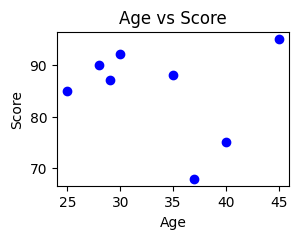

In [29]:
# 年齢とスコアの関係を散布図で可視化
import matplotlib.pyplot as plt
plt.figure(figsize=(3,2))
plt.scatter(df_clean_outliers['age'], df_clean_outliers['score'], color='blue')
plt.title('Age vs Score')
plt.xlabel('Age')
plt.ylabel('Score')

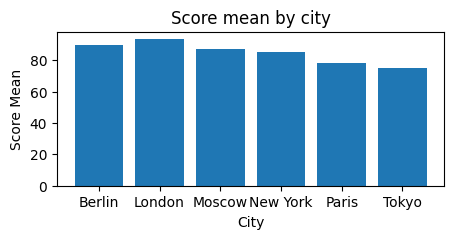

In [43]:
# 都市ごとのスコアの分布を棒グラフで可視化
cities = each_city_score_mean.index
scores = each_city_score_mean.values

plt.figure(figsize=(5,2))
plt.bar(cities, scores)
#each_city_score_mean.bar()
plt.title('Score mean by city')
plt.xlabel('City')
plt.ylabel('Score Mean')
plt.show()